In [1]:
from sklearn.model_selection import train_test_split
import pandas as pn
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
from sklearn import metrics

In [50]:
pwd

'C:\\Users\\jim87\\Documents\\GitHub\\hw2_M11023009'

'C:\\Users\\jim87\\Documents\\GitHub\\hw2_M11023009'

In [51]:
Dry_Bean_Dataset = pn.read_csv('Dry_Bean_Dataset.csv', skiprows = 1, header=None,  names=["Area","Perimeter","MajorAxisLength","MinorAxisLength","AspectRation","Eccentricity","ConvexArea","EquivDiameter","Extent","Solidity","roundness","Compactness","ShapeFactor1","ShapeFactor2","ShapeFactor3","ShapeFactor4","Class"])

In [52]:
Dry_Bean_Dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


# #資料量化

In [53]:
def dataCleaning(dataSet):
    #量化_換成number 0 1 2 3 (量化)
    
    occupation = list(set(dataSet['Class']))
    for i in range(len(occupation)):
        row = dataSet['Class'] == occupation[i]
        dataSet.loc[row,'Class'] = i+1
    dataSet['Class'] = dataSet['Class'].astype(np.int64)
        
   
      
    return dataSet

In [54]:
Dry_Bean_Dataset = dataCleaning(Dry_Bean_Dataset)
Dry_Bean_Dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,4
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,4
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,4
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,4
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,2
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,2
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,2
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,2


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,4
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,4
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,4
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,4
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,2
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,2
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,2
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,2


In [55]:
Dry_Bean_Dataset = Dry_Bean_Dataset.sample(frac=1)
Dry_Bean_Dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
7782,39728,760.568,282.088934,179.880714,1.568200,0.770307,40293,224.907227,0.695945,0.985978,0.863039,0.797292,0.007101,0.001770,0.635674,0.996865,7
3176,80886,1136.801,391.654490,263.801128,1.484658,0.739136,82299,320.916272,0.719492,0.982831,0.786528,0.819386,0.004842,0.001346,0.671394,0.996790,6
4473,71943,1040.514,392.529688,235.733118,1.665144,0.799588,73246,302.656030,0.670835,0.982211,0.835031,0.771040,0.005456,0.001190,0.594502,0.989932,5
11799,31751,661.724,247.781701,163.859382,1.512161,0.750117,32145,201.063743,0.731725,0.987743,0.911200,0.811455,0.007804,0.002087,0.658459,0.995697,2
11018,28843,628.281,226.847246,162.607376,1.395061,0.697264,29170,191.635196,0.711330,0.988790,0.918211,0.844776,0.007865,0.002471,0.713647,0.995581,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,28814,628.443,236.442303,155.572914,1.519817,0.753041,29137,191.538832,0.773323,0.988914,0.916815,0.810087,0.008206,0.002180,0.656241,0.997366,2
4462,71810,1055.735,385.046183,246.379429,1.562818,0.768483,75224,302.376143,0.734840,0.954616,0.809627,0.785298,0.005362,0.001258,0.616694,0.963780,5
6669,55475,971.678,380.808809,186.731661,2.039337,0.871523,56330,265.768628,0.665575,0.984822,0.738350,0.697906,0.006865,0.001005,0.487072,0.993305,3
6787,56889,951.582,384.236934,190.177318,2.020414,0.868923,57644,269.134398,0.613504,0.986902,0.789488,0.700439,0.006754,0.001003,0.490614,0.991244,3


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
7782,39728,760.568,282.088934,179.880714,1.568200,0.770307,40293,224.907227,0.695945,0.985978,0.863039,0.797292,0.007101,0.001770,0.635674,0.996865,7
3176,80886,1136.801,391.654490,263.801128,1.484658,0.739136,82299,320.916272,0.719492,0.982831,0.786528,0.819386,0.004842,0.001346,0.671394,0.996790,6
4473,71943,1040.514,392.529688,235.733118,1.665144,0.799588,73246,302.656030,0.670835,0.982211,0.835031,0.771040,0.005456,0.001190,0.594502,0.989932,5
11799,31751,661.724,247.781701,163.859382,1.512161,0.750117,32145,201.063743,0.731725,0.987743,0.911200,0.811455,0.007804,0.002087,0.658459,0.995697,2
11018,28843,628.281,226.847246,162.607376,1.395061,0.697264,29170,191.635196,0.711330,0.988790,0.918211,0.844776,0.007865,0.002471,0.713647,0.995581,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,28814,628.443,236.442303,155.572914,1.519817,0.753041,29137,191.538832,0.773323,0.988914,0.916815,0.810087,0.008206,0.002180,0.656241,0.997366,2
4462,71810,1055.735,385.046183,246.379429,1.562818,0.768483,75224,302.376143,0.734840,0.954616,0.809627,0.785298,0.005362,0.001258,0.616694,0.963780,5
6669,55475,971.678,380.808809,186.731661,2.039337,0.871523,56330,265.768628,0.665575,0.984822,0.738350,0.697906,0.006865,0.001005,0.487072,0.993305,3
6787,56889,951.582,384.236934,190.177318,2.020414,0.868923,57644,269.134398,0.613504,0.986902,0.789488,0.700439,0.006754,0.001003,0.490614,0.991244,3


# #拆分訓練集與測試集

In [56]:
#設定答案
Dry_Bean_Dataset_target = Dry_Bean_Dataset.pop('Class')

In [57]:
x_train,x_test,y_train,y_test = train_test_split(Dry_Bean_Dataset,Dry_Bean_Dataset_target,test_size=0.2)

In [58]:
y_train

13577    2
8364     7
13227    2
3346     6
4137     5
        ..
3255     6
904      4
8642     7
11373    2
1045     4
Name: Class, Length: 10888, dtype: int64

13577    2
8364     7
13227    2
3346     6
4137     5
        ..
3255     6
904      4
8642     7
11373    2
1045     4
Name: Class, Length: 10888, dtype: int64

# #SVR

In [78]:
clf = SVR().fit(x_train, y_train)

In [79]:
y_predict = clf.predict(x_test)

In [80]:
print("準確率：", clf.score(x_test, y_test))

準確率： 0.36444233420053285
準確率： 0.36444233420053285


In [81]:
def MAPE(y_test,y_Predicted):
    mape = np.mean(np.abs((y_test - y_Predicted)/y_test))*100
    return mape

In [82]:
print("RMSE:",np.sqrt(MSE(y_test,y_predict)))
print("MAE:",MAE(y_test,y_predict))
print("MAPE:",MAPE(y_test,y_predict),"%")

RMSE: 1.5552816641805511
MAE: 1.2010702489530827
MAPE: 31.018340612581923 %
RMSE: 1.5552816641805511
MAE: 1.2010702489530827
MAPE: 31.018340612581923 %


Text(0, 0.5, 'Measured')

Text(0, 0.5, 'Measured')

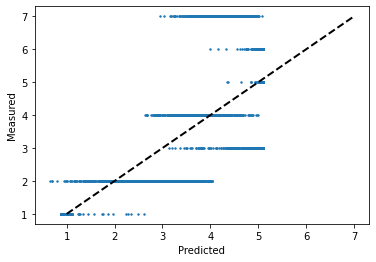

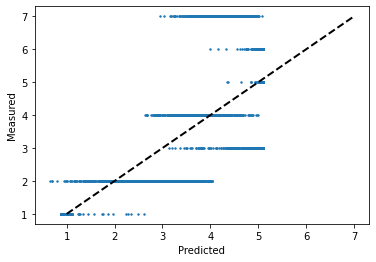

In [83]:
plt.scatter(y_predict,y_test,s=2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Measured')